Performing grid search for Linear Regression, 


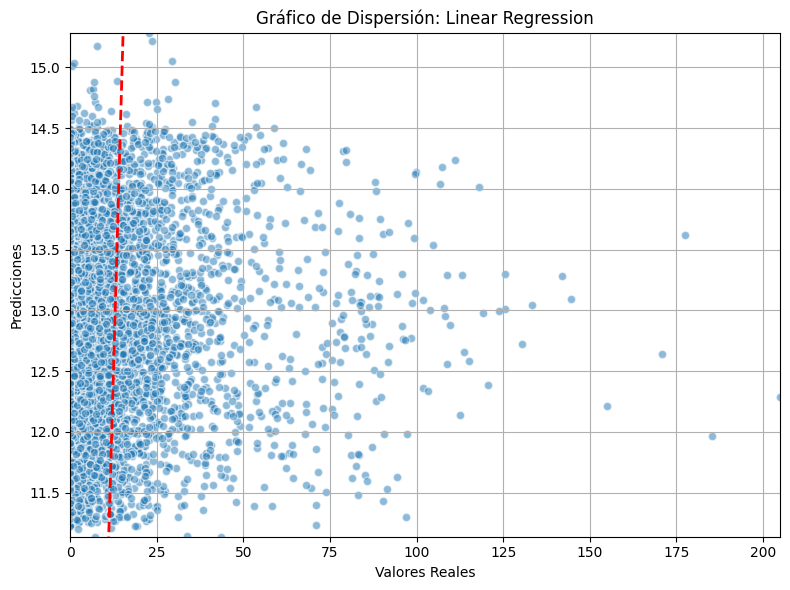

Performing grid search for Ridge Regression, 


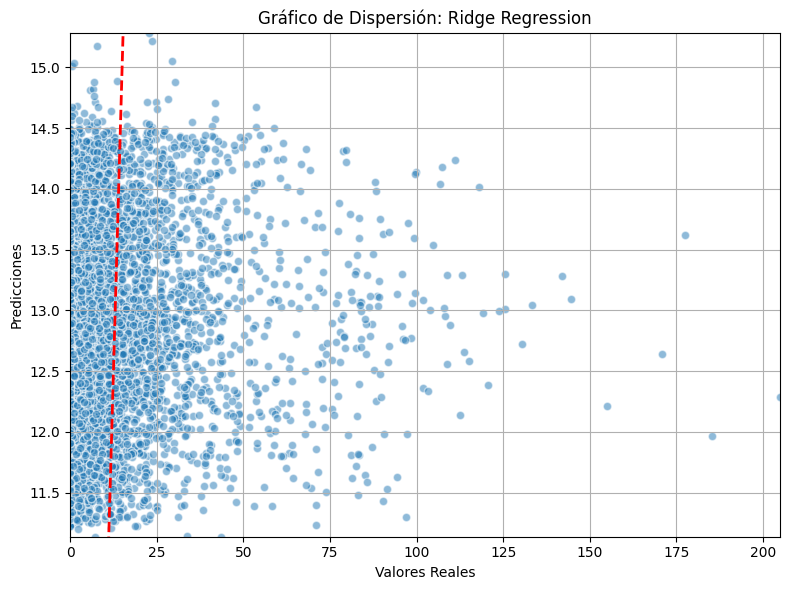

Performing grid search for Lasso Regression, 


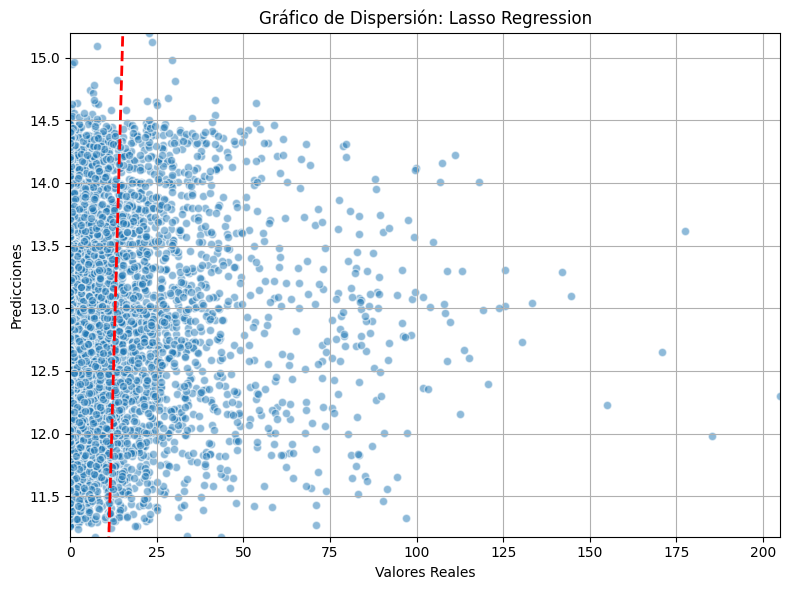

Performing grid search for Support Vector Regression, 


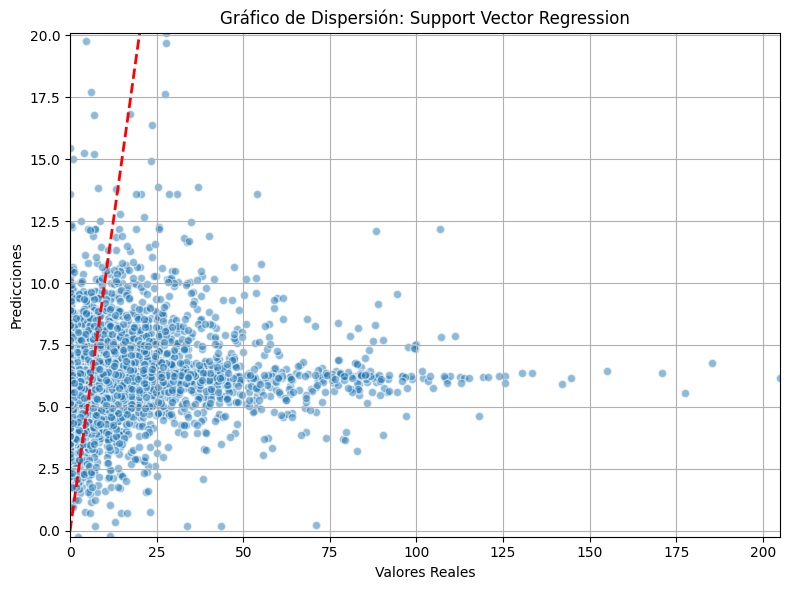

Performing grid search for Random Forest Regression, 


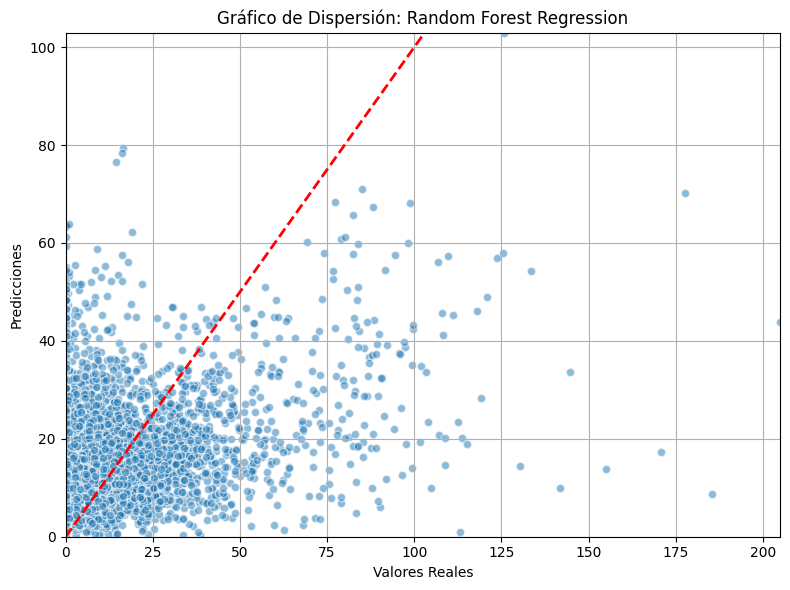

Performing grid search for Gradient Boosting Regression, 


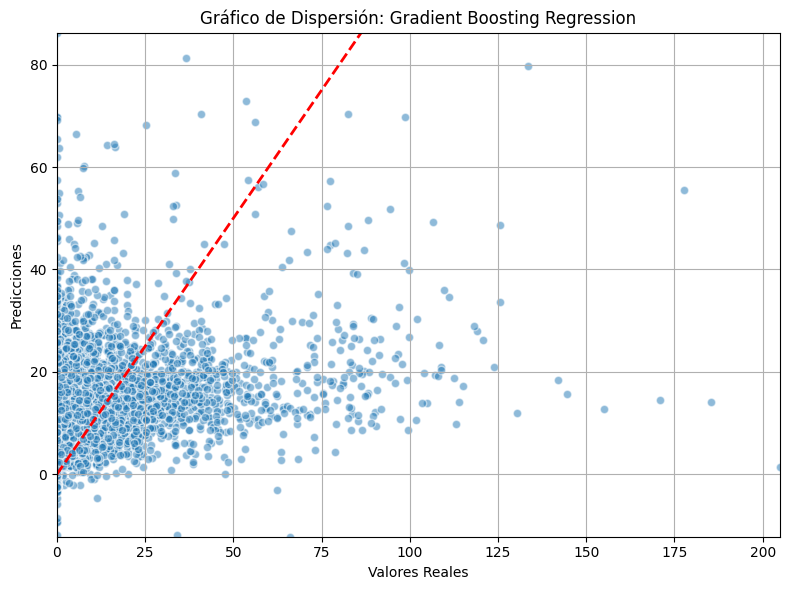

Performing grid search for Multi-layer Perceptron Regression, 


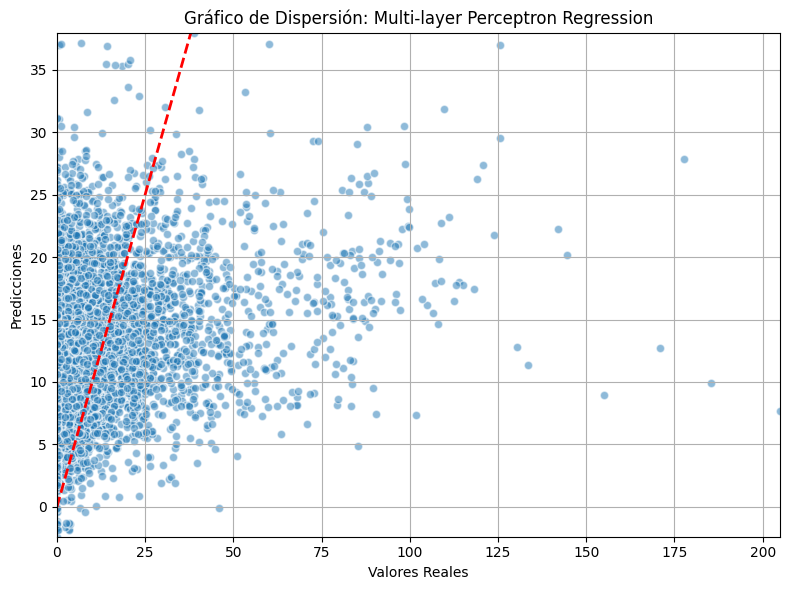

,Model,Best Parameters,Negative Mean Squared Error,Test MSE,R-squared (R2),Mean Absolute Error,Median Absolute Error
0,Linear Regression,{},361.464397,349.075387,0.001098,12.437802,10.508676
1,Ridge Regression,{'alpha': 10.0},361.464319,349.075355,0.001098,12.437818,10.508615
2,Lasso Regression,{'alpha': 0.01},361.463549,349.081436,0.001081,12.439051,10.512368
3,Support Vector Regression,"{'C': 10.0, 'epsilon': 1.0, 'kernel': 'poly'}",405.471220,386.963981,-0.107322,10.824313,5.619353
4,Random Forest Regression,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",292.744226,308.735591,0.116533,11.549929,7.657562
5,Gradient Boosting Regression,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",314.141767,336.866357,0.036035,12.138856,8.530572
6,Multi-layer Perceptron Regression,"{'activation': 'tanh', 'alpha': 0.001, 'hidden...",345.708330,319.567805,0.085536,11.517033,8.139096


In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    make_scorer,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    median_absolute_error,
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", None)

# Carga del dataset
data = pd.read_csv("./data/master_procesado.csv", sep=";", encoding="utf-8")

# Definición de las variables de regresión y objetivo
regression_features = ["year", "population", "gdp_per_capita ($)"]
regression_target = "suicides/100k pop"
data["suicides/100k pop"] = (
    data["suicides/100k pop"].str.replace(",", ".").astype(float)
)

# Partición del dataset en train y test 
X_reg = data[regression_features]
y_reg = data[regression_target]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Seleccionar los modelos de regresión a evaluar y sus hiperparámetros
regression_models = {
    "Linear Regression": (LinearRegression(), {}),
    "Ridge Regression": (Ridge(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0]}),
    "Lasso Regression": (Lasso(), {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0]}),
    "Support Vector Regression": (
        SVR(),
        {
            "C": [0.1, 1.0, 10.0],
            "epsilon": [0.01, 0.1, 1.0],
            "kernel": ["linear", "poly", "rbf"],
        },
    ),
    "Random Forest Regression": (
        RandomForestRegressor(),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    ),
    "Gradient Boosting Regression": (
        GradientBoostingRegressor(),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 4, 5],
            "learning_rate": [0.01, 0.1, 0.2],
            "min_samples_split": [2, 5, 10],
        },
    ),
    "Multi-layer Perceptron Regression": (
        MLPRegressor(),
        {
            "hidden_layer_sizes": [(5,), (15,), (30,), (5, 10), (15, 30), (5, 10, 15)],
            "activation": ["logistic", "tanh", "relu"],
            "alpha": [0.0001, 0.001, 0.01],
            "solver": ["adam", "lbfgs"],
            "learning_rate_init": [0.001, 0.01, 0.1],
        },
    ),
}


# Definición de las métricas de evaluación de los modelos
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)
mae_scorer = make_scorer(mean_absolute_error)
med_ae_scorer = make_scorer(median_absolute_error)

# Realizar la búsqueda de hiperparámetros para cada modelo de regresión con grid search y evaluarlo con las métricas definidas usando validación cruzada con 5 particiones
results = []

for model_name, (model, param_grid) in regression_models.items():
    print(f"Performing grid search for {model_name}, ")
    grid = GridSearchCV(model, param_grid, scoring=mse_scorer, cv=5, refit=True)
    grid.fit(StandardScaler().fit_transform(X_train_reg), y_train_reg)
    best_params = grid.best_params_
    neg_mean_squared_error = -grid.best_score_
    test_predictions = grid.predict(StandardScaler().fit_transform(X_test_reg))
    test_mse = mean_squared_error(y_test_reg, test_predictions)
    r2 = r2_score(y_test_reg, test_predictions)
    mae = mean_absolute_error(y_test_reg, test_predictions)
    med_ae = median_absolute_error(y_test_reg, test_predictions)

    results.append(
        {
            "Model": model_name,
            "Best Parameters": best_params,
            "Negative Mean Squared Error": neg_mean_squared_error,
            "Test MSE": test_mse,
            "R-squared (R2)": r2,
            "Mean Absolute Error": mae,
            "Median Absolute Error": med_ae,
        }
    )

    # Personalizar el gráfico de dispersión de los valores reales y las predicciones 
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, test_predictions, alpha=0.5, edgecolors="w")
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.title(f"Gráfico de Dispersión: {model_name}")
    plt.grid(True)
    plt.xlim(min(y_test_reg), max(y_test_reg))
    plt.ylim(min(test_predictions), max(test_predictions))
    plt.plot(
        [min(y_test_reg), max(y_test_reg)],
        [min(y_test_reg), max(y_test_reg)],
        color="red",
        linestyle="--",
        lw=2,
    )
    plt.tight_layout()
    plt.show()

# Mostrar los resultados de la búsqueda de hiperparámetros y la evaluación de los modelos con las métricas definidas 
results_df = pd.DataFrame(results)
display(results_df)

In [3]:
pd.set_option("display.max_colwidth", None)
display(results_df)

,Model,Best Parameters,Negative Mean Squared Error,Test MSE,R-squared (R2),Mean Absolute Error,Median Absolute Error
0,Linear Regression,{},361.464397,349.075387,0.001098,12.437802,10.508676
1,Ridge Regression,{'alpha': 10.0},361.464319,349.075355,0.001098,12.437818,10.508615
2,Lasso Regression,{'alpha': 0.01},361.463549,349.081436,0.001081,12.439051,10.512368
3,Support Vector Regression,"{'C': 10.0, 'epsilon': 1.0, 'kernel': 'poly'}",405.471220,386.963981,-0.107322,10.824313,5.619353
4,Random Forest Regression,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}",292.744226,308.735591,0.116533,11.549929,7.657562
5,Gradient Boosting Regression,"{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}",314.141767,336.866357,0.036035,12.138856,8.530572
6,Multi-layer Perceptron Regression,"{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (15, 30), 'learning_rate_init': 0.01, 'solver': 'adam'}",345.708330,319.567805,0.085536,11.517033,8.139096


**Análisis de Resultados**

1. **Modelos de Regresión Lineal, Ridge y Lasso**:
Los modelos de Regresión Lineal, Ridge y Lasso muestran un rendimiento similar con errores cuadráticos medios (MSE) cercanos a 361.46 en el conjunto de entrenamiento y alrededor de 349.08 en el conjunto de prueba. Estos modelos tienen un bajo coeficiente de determinación (R2) de aproximadamente 0.0011, lo que indica una capacidad limitada para explicar la variabilidad en los datos. Además, el error absoluto mediano (Median Absolute Error) es alto, alrededor de 10.51, lo que sugiere que las predicciones tienden a alejarse de los valores reales en un margen considerable. En general, estos modelos de regresión lineal simple no se ajustan adecuadamente a la complejidad de los datos y muestran un rendimiento deficiente.

2. **Support Vector Regression (SVR)**:
El modelo SVR muestra un rendimiento inferior con un alto MSE de aproximadamente 405.47 en el conjunto de entrenamiento y 386.96 en el conjunto de prueba. El coeficiente de determinación (R2) es negativo (-0.1073), lo que sugiere que SVR no se adapta bien a los datos y tiene dificultades para explicar la variabilidad. El error absoluto mediano (Median Absolute Error) es de aproximadamente 5.62, lo que indica que las predicciones tienden a desviarse considerablemente de los valores reales. SVR no parece ser una elección adecuada para este problema de regresión.

3. **Random Forest Regression**:
El modelo de Regresión de Bosque Aleatorio (Random Forest) muestra un mejor rendimiento con un MSE de alrededor de 292.74 en el conjunto de entrenamiento y 308.74 en el conjunto de prueba. El coeficiente de determinación (R2) es de aproximadamente 0.1165, lo que indica una mejor capacidad para explicar la variabilidad en los datos en comparación con los modelos anteriores. El error absoluto mediano (Median Absolute Error) es de aproximadamente 7.66, lo que sugiere que las predicciones tienden a estar más cerca de los valores reales en comparación con los modelos anteriores. El modelo de Regresión de Bosque Aleatorio es una elección prometedora para este problema de regresión, aunque aún puede mejorarse.

4. **Gradient Boosting Regression**:
El modelo de Regresión de Reforzamiento (Gradient Boosting) muestra un rendimiento similar al Random Forest con un MSE de alrededor de 314.14 en el conjunto de entrenamiento y 336.87 en el conjunto de prueba. El coeficiente de determinación (R2) es de aproximadamente 0.0360, lo que indica una capacidad moderada para explicar la variabilidad en los datos. El error absoluto mediano (Median Absolute Error) es de aproximadamente 8.53, lo que sugiere que las predicciones tienden a tener una mayor desviación de los valores reales en comparación con el Random Forest. Aunque el Gradient Boosting es un buen modelo, el Random Forest supera ligeramente su rendimiento en este caso.

5. **Multi-layer Perceptron Regression (MLP)**:
El modelo de Regresión de Perceptrón Multicapa (MLP) muestra un MSE de aproximadamente 345.71 en el conjunto de entrenamiento y 319.57 en el conjunto de prueba. El coeficiente de determinación (R2) es de aproximadamente 0.0855, lo que indica una capacidad moderada para explicar la variabilidad en los datos. El error absoluto mediano (Median Absolute Error) es de aproximadamente 8.14, lo que sugiere que las predicciones tienden a alejarse más de los valores reales en comparación con otros modelos. Aunque el MLP muestra un rendimiento aceptable, no logra superar a los modelos basados en árboles (Random Forest y Gradient Boosting) en este contexto.

**Conclusión**:
Los modelos de Regresión Lineal, Ridge y Lasso no son apropiados para este problema, ya que no se adaptan bien a la complejidad de los datos y tienen un bajo poder predictivo. SVR tampoco es una buena elección debido a su rendimiento inferior con un R2 negativo. Tanto Random Forest como Gradient Boosting son modelos sólidos, con el primero mostrando un rendimiento ligeramente superior con un R2 más alto y un menor MSE en el conjunto de prueba. El modelo MLP, aunque aceptable, no logra superar a los modelos basados en árboles (Random Forest y Gradient Boosting) en este contexto.